# 数据分析（EDA）

### 该数据集包含球员和裁判之间的事情

### 分析这些数据中是否存在线性相关的数据

In [2]:
from __future__ import absolute_import, division, print_function
from matplotlib.pyplot import GridSpec
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
#from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

import time

%matplotlib inline
%config InlineBackend.figure_format='retina'

## 数据简介：

> 数据包含球员和裁判的信息，2012-2013年的比赛数据，总共设计球员2053名，裁判3147名，特征列表如下：



| Variable Name: | Variable Description: | 
| -- | -- | 
| playerShort | short player ID | 
| player | player name | 
| club | player club | 
| leagueCountry | country of player club (England, Germany, France, and Spain) | 
| height | player height (in cm) | 
| weight | player weight (in kg) | 
| position | player position | 
| games | number of games in the player-referee dyad | 
| goals | number of goals in the player-referee dyad | 
| yellowCards | number of yellow cards player received from the referee | 
| yellowReds | number of yellow-red cards player received from the referee | 
| redCards | number of red cards player received from the referee | 
| photoID | ID of player photo (if available) | 
| rater1 | skin rating of photo by rater 1 | 
| rater2 | skin rating of photo by rater 2 | 
| refNum | unique referee ID number (referee name removed for anonymizing purposes) | 
| refCountry | unique referee country ID number | 
| meanIAT | mean implicit bias score (using the race IAT) for referee country | 
| nIAT | sample size for race IAT in that particular country | 
| seIAT | standard error for mean estimate of race IAT   | 
| meanExp | mean explicit bias score (using a racial thermometer task) for referee country | 
| nExp | sample size for explicit bias in that particular country | 
| seExp |  standard error for mean estimate of explicit bias measure | 


In [3]:
df = pd.read_csv("redcard.csv")   #  读取数据

In [4]:
df.shape

(146028, 28)

In [5]:
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [6]:
df.describe().T        #对数据进行简单统计，并以原始数据的转置来查看

,count,mean,std,min,25%,50%,75%,max
height,145765.0,181.935938,6.738726,1.610000e+02,177.000000,182.000000,187.000000,2.030000e+02
weight,143785.0,76.075662,7.140906,5.400000e+01,71.000000,76.000000,81.000000,1.000000e+02
games,146028.0,2.921166,3.413633,1.000000e+00,1.000000,2.000000,3.000000,4.700000e+01
victories,146028.0,1.278344,1.790725,0.000000e+00,0.000000,1.000000,2.000000,2.900000e+01
ties,146028.0,0.708241,1.116793,0.000000e+00,0.000000,0.000000,1.000000,1.400000e+01
defeats,146028.0,0.934581,1.383059,0.000000e+00,0.000000,1.000000,1.000000,1.800000e+01
goals,146028.0,0.338058,0.906481,0.000000e+00,0.000000,0.000000,0.000000,2.300000e+01
yellowCards,146028.0,0.385364,0.795333,0.000000e+00,0.000000,0.000000,1.000000,1.400000e+01
yellowReds,146028.0,0.011381,0.107931,0.000000e+00,0.000000,0.000000,0.000000,3.000000e+00
redCards,146028.0,0.012559,0.112889,0.000000e+00,0.000000,0.000000,0.000000,2.000000e+00


In [7]:
df.dtypes     #查看各种指标的数据类型

playerShort       object
player            object
club              object
leagueCountry     object
birthday          object
height           float64
weight           float64
position          object
games              int64
victories          int64
ties               int64
defeats            int64
goals              int64
yellowCards        int64
yellowReds         int64
redCards           int64
photoID           object
rater1           float64
rater2           float64
refNum             int64
refCountry         int64
Alpha_3           object
meanIAT          float64
nIAT             float64
seIAT            float64
meanExp          float64
nExp             float64
seExp            float64
dtype: object

In [8]:
all_columns = df.columns.tolist()        #查看所有列名（指标），并将其放入列表中 ，方便去掉没用的列
all_columns

['playerShort',
 'player',
 'club',
 'leagueCountry',
 'birthday',
 'height',
 'weight',
 'position',
 'games',
 'victories',
 'ties',
 'defeats',
 'goals',
 'yellowCards',
 'yellowReds',
 'redCards',
 'photoID',
 'rater1',
 'rater2',
 'refNum',
 'refCountry',
 'Alpha_3',
 'meanIAT',
 'nIAT',
 'seIAT',
 'meanExp',
 'nExp',
 'seExp']

In [9]:
df['height'].mean()       #计算运动员的平均身高

181.93593798236887

### 但是可能有的运动员在数据中出现了好几次，这样直接计算会导致结果不准确

In [10]:
np.mean(df.groupby('playerShort').height.mean())    #以 playerShort 为键对 height 分类，这样可以避免一个球员出现几次，计算结果更加准确

181.74372848007872

In [11]:
#统计出球员的所有信息进行建表，数据模块切分
player_index = 'playerShort'               # 表的索引
player_cols = [#'player',                  # 删除玩家姓名，因为使用playerShort作为唯一标识
               'birthday',
               'height',
               'weight',
               'position',
               'photoID',
               'rater1',
               'rater2',
               'goals'
              ]

In [12]:
# 查看数据内部是否存在问题
# 对数据进行 groupby 分组，查看数据是否存在重复值，使用 nunique 方法来判断每列数据是否有重复值
all_cols_unique_players = df.groupby('playerShort').agg({col:'nunique' for col in player_cols})


In [13]:
all_cols_unique_players.head()   # 每列数据出现 1 表示该值只出现了一次，如果出现了其它值则表示该值出现了好多次

,birthday,height,weight,position,photoID,rater1,rater2,goals
playerShort,,,,,,,,
aaron-hughes,1,1,1,1,1,1,1,3
aaron-hunt,1,1,1,1,1,1,1,6
aaron-lennon,1,1,1,1,1,1,1,5
aaron-ramsey,1,1,1,1,1,1,1,4
abdelhamid-el-kaoutari,1,1,1,1,1,1,1,2


In [14]:
#对上面表中的所有数据进行判断，如果每个值出现的次数大于 1 则将其取掉
all_cols_unique_players[all_cols_unique_players > 1].dropna().head()

,birthday,height,weight,position,photoID,rater1,rater2,goals
playerShort,,,,,,,,


In [15]:
#判断上面所有数据出现的次数大于 1 的个数是否等于 0 
#结果显示 True，表示当前所有数据都是唯一的
all_cols_unique_players[all_cols_unique_players > 1].dropna().shape[0] == 0

True

In [16]:
all_cols_unique_players

,birthday,height,weight,position,photoID,rater1,rater2,goals
playerShort,,,,,,,,
aaron-hughes,1,1,1,1,1,1,1,3
aaron-hunt,1,1,1,1,1,1,1,6
aaron-lennon,1,1,1,1,1,1,1,5
aaron-ramsey,1,1,1,1,1,1,1,4
abdelhamid-el-kaoutari,1,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...
zoltan-stieber,1,1,1,1,1,1,1,4
zouheir-dhaouadi,1,1,1,0,0,0,0,4
zoumana-camara,1,1,1,1,1,1,1,2


In [17]:
#该函数是将上面判断表中所有数据是否唯一的所有步骤组合在一起
def get_subgroup(dataframe, g_index, g_columns):
    
    g = dataframe.groupby(g_index).agg({col:'nunique' for col in g_columns})
    if g[g > 1].dropna().shape[0] != 0:
        print("存在不唯一的值！")
    return dataframe.groupby(g_index).agg({col:'max' for col in g_columns})

In [18]:
players = get_subgroup(df, player_index, player_cols)
players.head(8)

,birthday,height,weight,position,photoID,rater1,rater2,goals
playerShort,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,2
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,6
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,4
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,3
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,1
abdon-prats,17.12.1992,181.0,79.0,NaN,NaN,NaN,NaN,2
abdou-dampha,27.12.1991,184.0,74.0,Attacking Midfielder,NaN,NaN,NaN,1
abdou-traore_2,17.01.1988,180.0,74.0,Right Midfielder,102005.jpg,0.75,0.75,1


In [ ]:
pd.DataFrame(players).to_csv("Players.csv", encoding="utf_8_sig")  # 将处理后的数据另存为Players.csv文件

In [19]:
players = pd.read_csv("Players.csv")
players.head()

,playerShort,birthday,height,weight,position,photoID,rater1,rater2
0,aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00
1,aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25
2,aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25
3,aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00
4,abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25


In [20]:
players.shape

(2053, 8)

In [21]:
players.describe()

,height,weight,rater1,rater2
count,2033.000000,1973.000000,1585.000000,1585.00000
mean,181.743728,75.639635,0.268612,0.31041
std,6.690114,7.101795,0.296578,0.29666
min,161.000000,54.000000,0.000000,0.00000
25%,177.000000,71.000000,0.000000,0.00000
50%,182.000000,75.000000,0.250000,0.25000
75%,186.000000,80.000000,0.500000,0.50000
max,203.000000,100.000000,1.000000,1.00000


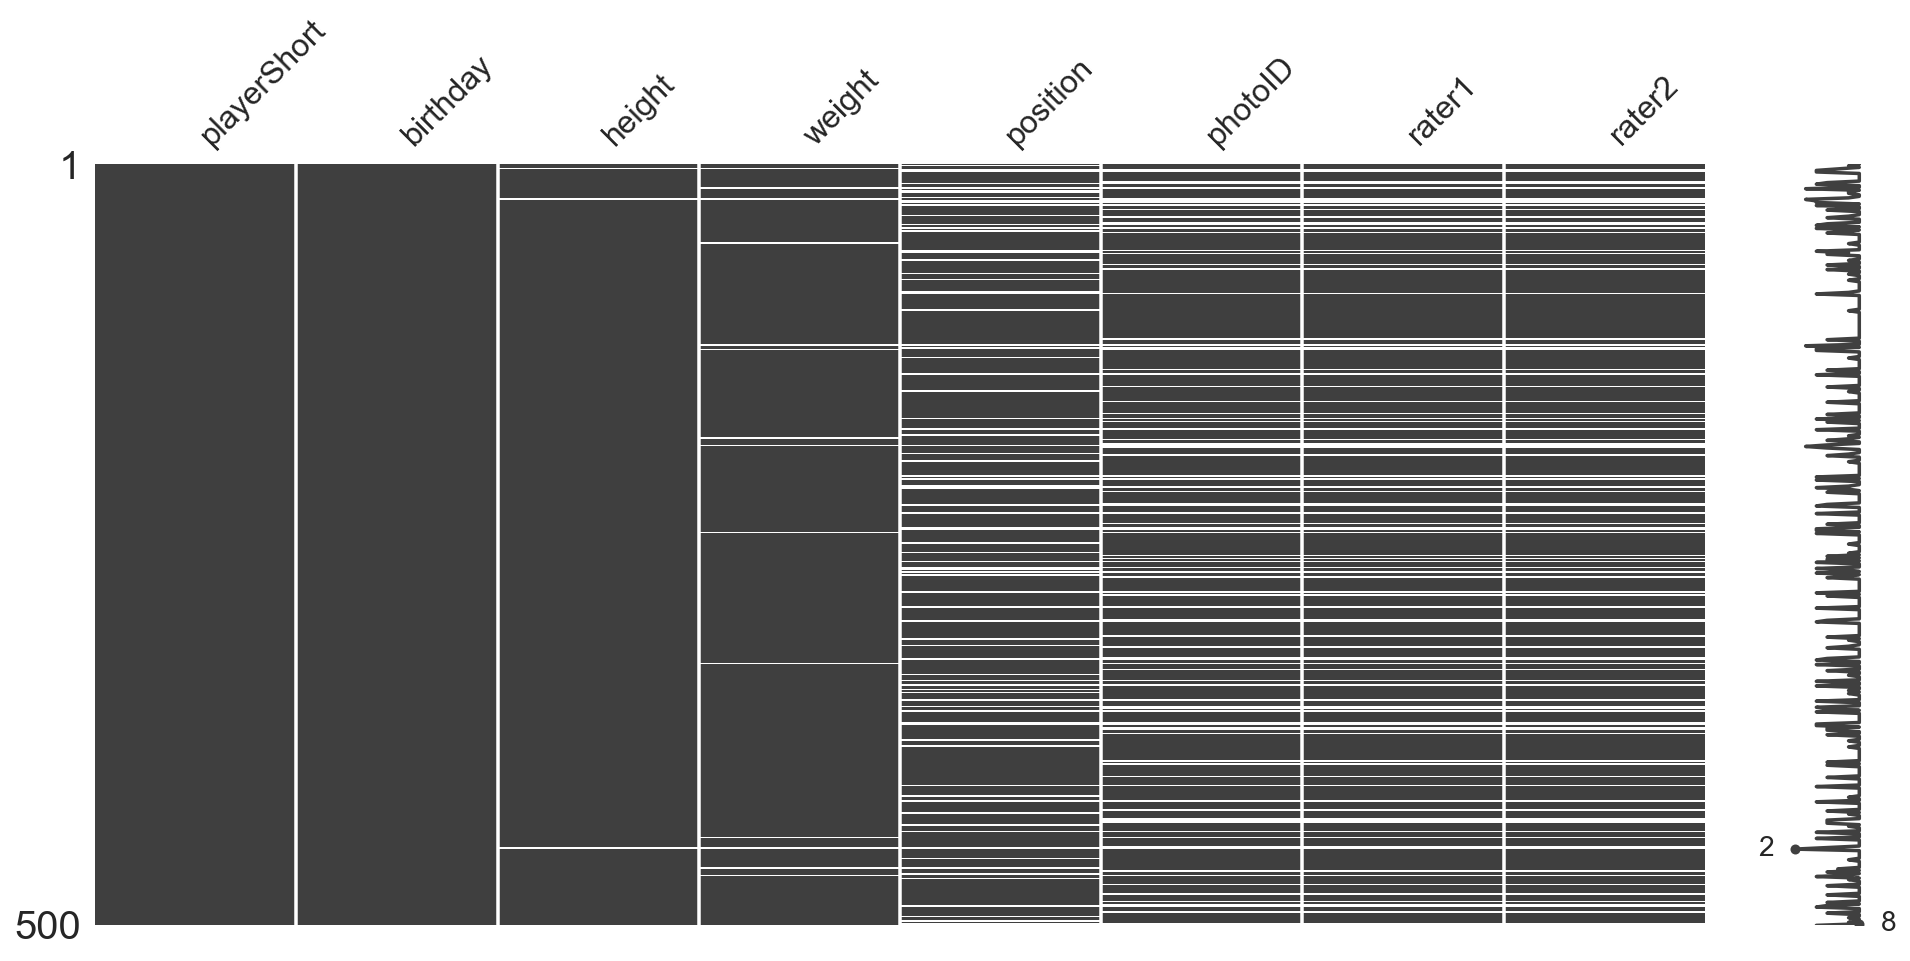

In [22]:
#对数据进行抽样，看一下抽样样本中的缺失值
#下图就是对缺失值的统计，纯色表示没有缺失值
msno.matrix(players.sample(500),   #从数据中提取500个样本
            figsize=(16, 7),
            width_ratios=(15, 1))

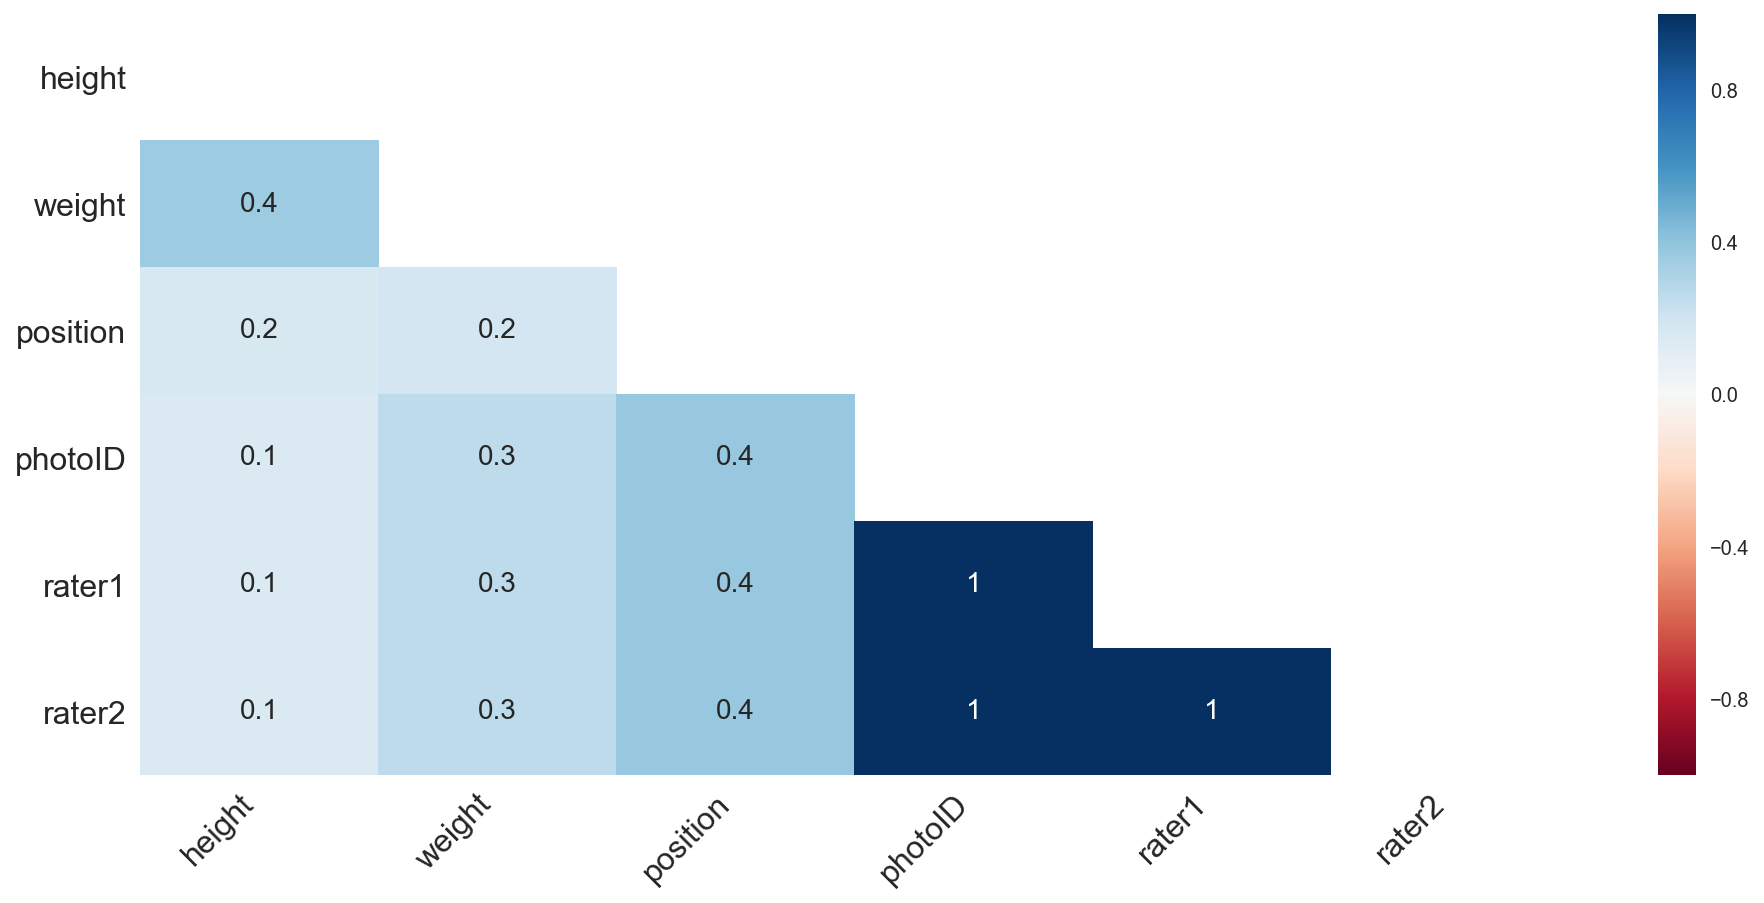

In [23]:
#绘制热度图，表示左边指标缺失，上面指标缺失的概率
msno.heatmap(players.sample(500),
            figsize=(16, 7),)

### 统计缺失值的个数

In [24]:
print("All players:", len(players))
print("rater1 nulls:", len(players[(players.rater1.isnull())]))
print("rater2 nulls:", len(players[players.rater2.isnull()]))
print("Both nulls:", len(players[(players.rater1.isnull()) & (players.rater2.isnull())]))

All players: 2053
rater1 nulls: 468
rater2 nulls: 468
Both nulls: 468


In [25]:
# modifying dataframe 统计非空值个数，去掉rate1 中的缺失值
players = players[players.rater1.notnull()]
players.shape[0]

1585

In [26]:
2053-1585

468

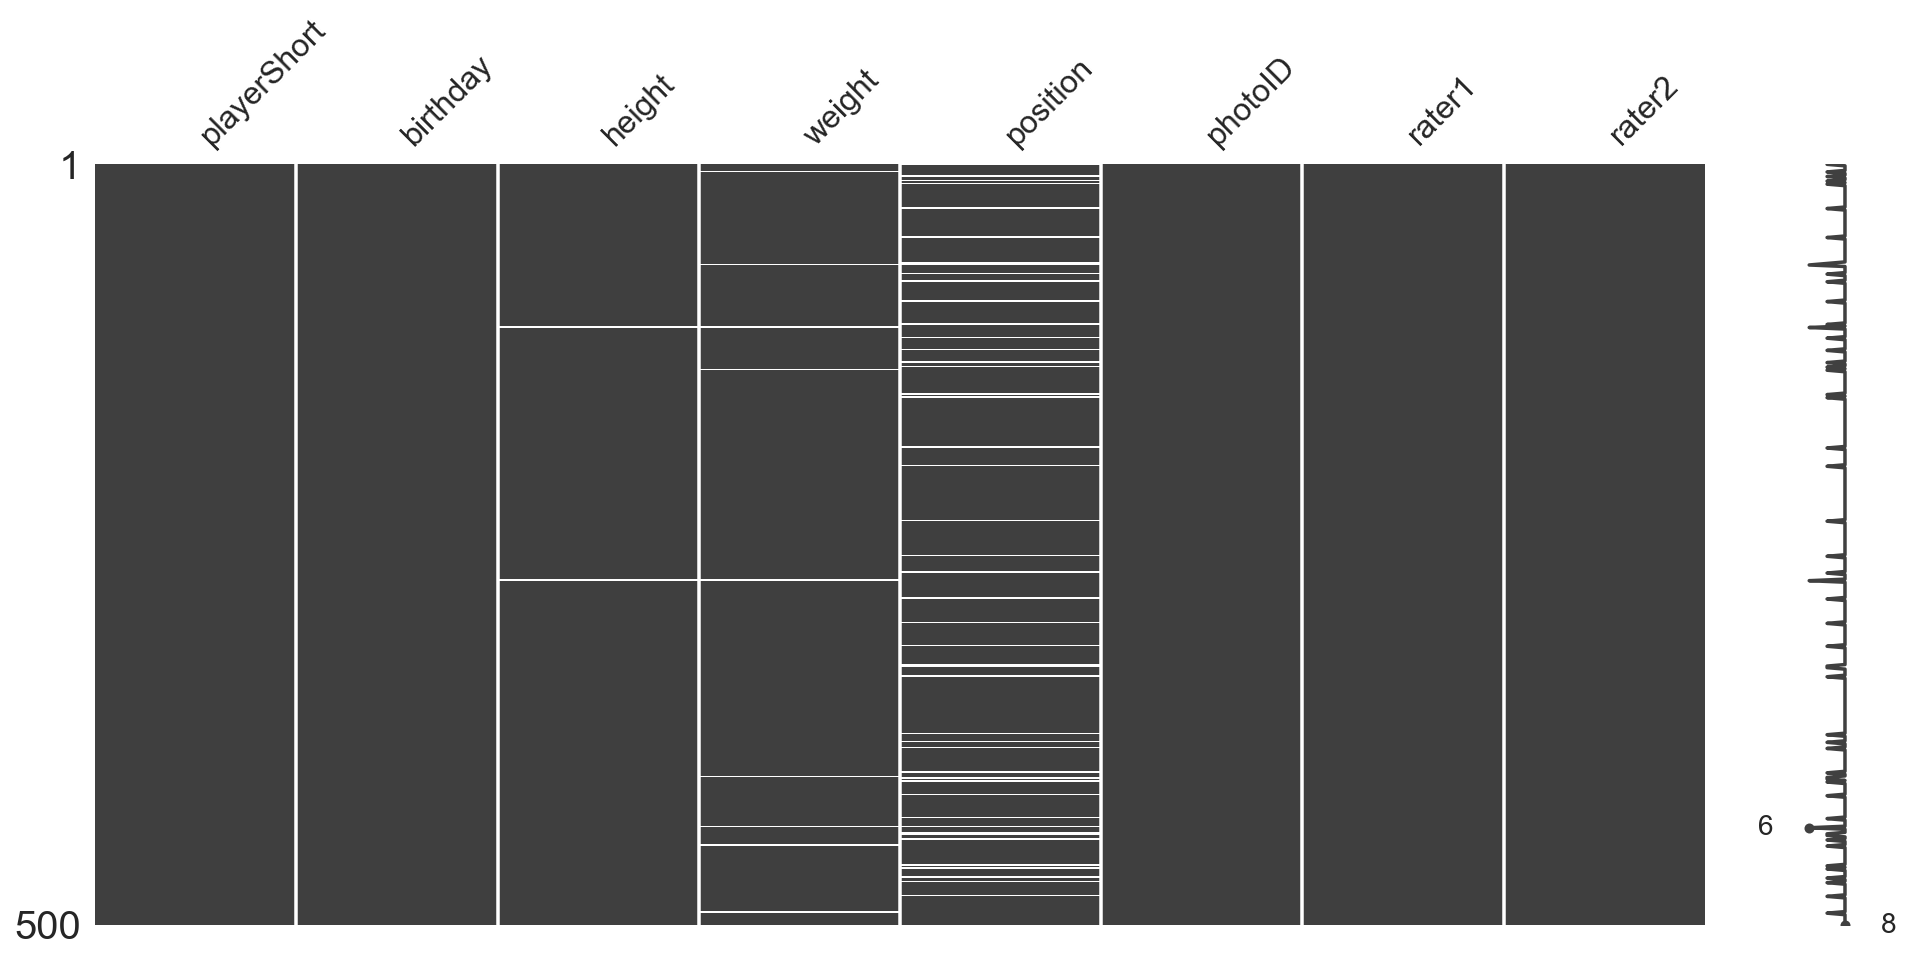

In [27]:
#去掉较多的缺失值
msno.matrix(players.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1))

### rate1和rate2看起来比较类似，对它们的相似性进行比较

In [29]:
pd.crosstab(players.rater1, players.rater2)
# crosstab 函数可以针对指定的两个指标进行绘制表格
#当取值越靠近对角线时表示两种指标的评估准则越类似，即线性相关

#当需要对两个类似指标进行比较时，可以使用 pandas 中的 crosstab 来
#绘制这两种指标的表格

rater2,0.00,0.25,0.50,0.75,1.00
rater1,,,,,
0.00,424,200,2,0,0
0.25,27,470,54,0,0
0.50,0,23,116,31,0
0.75,0,0,2,104,34
1.00,0,0,0,6,92


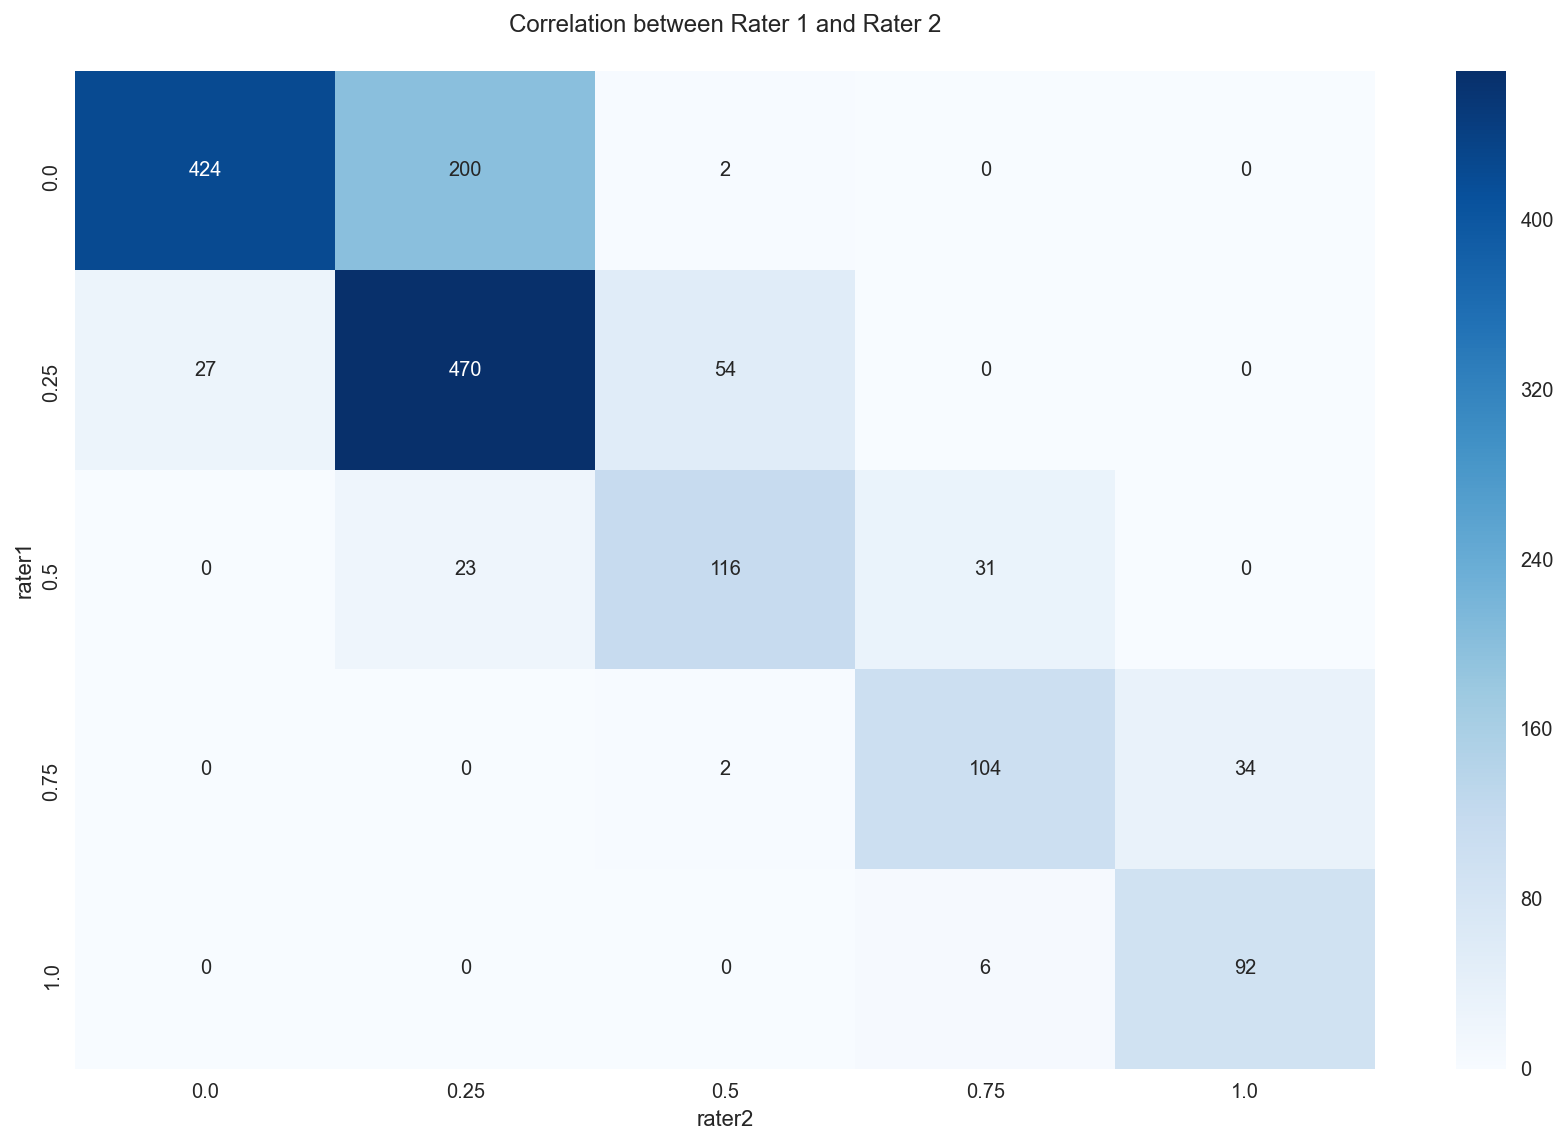

In [30]:
#使用热度图来表示上面生成的表格

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pd.crosstab(players.rater1, players.rater2), cmap='Blues', annot=True, fmt='d', ax=ax)
ax.set_title("Correlation between Rater 1 and Rater 2\n")
fig.tight_layout()

### 可以看出rate1和rate2的相似性很高，可以新加一列这两个指标的平均值

In [31]:
players.head()

,playerShort,birthday,height,weight,position,photoID,rater1,rater2
0,aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00
1,aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25
2,aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25
3,aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00
4,abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25


In [32]:
players['skintone'] = players[['rater1', 'rater2']].mean(axis=1) # 新增加一列表示两个指标的平均值即肤色值
players.head()

,playerShort,birthday,height,weight,position,photoID,rater1,rater2,skintone
0,aaron-hughes,08.11.1979,182.0,71.0,Center Back,3868.jpg,0.25,0.00,0.125
1,aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,20136.jpg,0.00,0.25,0.125
2,aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,13515.jpg,0.25,0.25,0.250
3,aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,94953.jpg,0.00,0.00,0.000
4,abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,124913.jpg,0.25,0.25,0.250


In [33]:
pd.DataFrame(players).to_csv("Clean_Players.csv", encoding="utf_8_sig")  # 将处理后的数据另存为Players.csv文件